In [26]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Data visualisation

In [14]:
df = pd.DataFrame({
'A': [0,0,0,0,0,1,1],
'B': [1,2,3,5,4,2,5],
'C': [5,3,4,1,1,2,3]})
a_group_desc = df.groupby('B').describe()
unstacked = a_group_desc.unstack()
print(unstacked)

          B
A  count  1    1.0
          2    2.0
          3    1.0
          4    1.0
          5    2.0
              ... 
C  max    1    5.0
          2    3.0
          3    4.0
          4    1.0
          5    3.0
Length: 80, dtype: float64


Détection et suppression des données redondantes

In [15]:
data = {
'Nom': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob'],
'Age': [25, 30, 35, 25, 30],
'Ville': ['Paris', 'Lyon', 'Marseille', 'Paris', 'Lyon']
}
df = pd.DataFrame(data)
print("DataFrame original :")
print(df)
db = df.duplicated()
print(df[db]) # Affiche les lignes dupliquées
df_new = df.drop_duplicates()
print(df_new) # Affiche le DataFrame sans les lignes dupliquées

DataFrame original :
       Nom  Age      Ville
0    Alice   25      Paris
1      Bob   30       Lyon
2  Charlie   35  Marseille
3    Alice   25      Paris
4      Bob   30       Lyon
     Nom  Age  Ville
3  Alice   25  Paris
4    Bob   30   Lyon
       Nom  Age      Ville
0    Alice   25      Paris
1      Bob   30       Lyon
2  Charlie   35  Marseille


In [16]:
# Supprimer les doublons en fonction de la colonne 'Nom'
df_new = df.drop_duplicates(subset=['Nom'])
print(df_new)

       Nom  Age      Ville
0    Alice   25      Paris
1      Bob   30       Lyon
2  Charlie   35  Marseille


Traitement des données manquantes

In [18]:
s = pd.Series([1, 2, 3, np.nan, 5, 6, None])
print("Visualiser les données manquantes : true means a detection of a missing data")
print (s.isnull())
print ("Isoler les données manquantes")
print(s[s.isnull()])
print(s.fillna(int(s.mean()))) # Remplace les valeurs manquantes par la moyenne
print(s.dropna()) # Supprime les valeurs manquantes

Visualiser les données manquantes : true means a detection of a missing data
0    False
1    False
2    False
3     True
4    False
5    False
6     True
dtype: bool
Isoler les données manquantes
3   NaN
6   NaN
dtype: float64
0    1.0
1    2.0
2    3.0
3    3.0
4    5.0
5    6.0
6    3.0
dtype: float64
0    1.0
1    2.0
2    3.0
4    5.0
5    6.0
dtype: float64


Imputation des données manquantes

In [19]:
df = pd.DataFrame()
df['x0'] = [0.3051,np.nan,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
df['x1'] = [np.nan,0.2654,0.2615,0.5846,0.4615,0.8308,0.4962,0.3269,0.5346,0.6731]
print("Data :")
print(df)
print("Moyenne de chaque colonne :")
print(df['x0'].mean())
print(df['x1'].mean())
mean_imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
mean_imputer = mean_imputer.fit(df)
imputed_df = mean_imputer.transform(df.values)
# View the dataset
print("Data après imputation")
print(imputed_df)

Data :
       x0      x1
0  0.3051     NaN
1     NaN  0.2654
2  0.6974  0.2615
3  0.3769  0.5846
4  0.2231  0.4615
5  0.3410  0.8308
6  0.4436  0.4962
7  0.5897  0.3269
8  0.6308  0.5346
9  0.5000  0.6731
Moyenne de chaque colonne :
0.4564
0.4927333333333334
Data après imputation
[[0.3051     0.49273333]
 [0.4564     0.2654    ]
 [0.6974     0.2615    ]
 [0.3769     0.5846    ]
 [0.2231     0.4615    ]
 [0.341      0.8308    ]
 [0.4436     0.4962    ]
 [0.5897     0.3269    ]
 [0.6308     0.5346    ]
 [0.5        0.6731    ]]


c:\Users\My_Computing\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Sorting et Shuffling

In [20]:
df = pd.DataFrame({'A': [2,1,2,3,3,5,4],'B': [1,2,3,5,4,2,5],'C': [5,3,4,1,1,2,3]})
print(df)
print("Le jeu de données est trié selon la colonne 'A'")
df_sorted = df.sort_values(by=['A'], ascending=[True])
# df = df.reset_index(drop=True) -> reinitialiser l'index
print(df_sorted)
df = df.reset_index(drop=True)
# Shuffling du jeu de données selon le cours
index = df.index.tolist()
np.random.shuffle(index)
df = df.reset_index(drop=True)
# Shuffling du jeu de données autrement
print("Le jeu de données mélangé")
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
print(df_shuffled)
# ix[] is no longer valid in the latest version of pandas

   A  B  C
0  2  1  5
1  1  2  3
2  2  3  4
3  3  5  1
4  3  4  1
5  5  2  2
6  4  5  3
Le jeu de données est trié selon la colonne 'A'
   A  B  C
1  1  2  3
0  2  1  5
2  2  3  4
3  3  5  1
4  3  4  1
6  4  5  3
5  5  2  2
Le jeu de données mélangé
   A  B  C
0  2  1  5
1  1  2  3
2  5  2  2
3  2  3  4
4  3  4  1
5  3  5  1
6  4  5  3


Transformation des données (Normalisation)

In [21]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
# Has no Missing Values
names= ['constructor','Model','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']
dataset = pd.read_csv(url, names=names)
# print("data:") # print(dataset)
# MIN MAX SCALING
minmax_scale = MinMaxScaler().fit(dataset[['MYCT', 'MMAX']])
df_minmax = minmax_scale.transform(dataset[['MYCT', 'MMAX']])
print('********** Normalisation*********\n')
print('Moyenne apres le Min max Scaling :\nMYCT={:.2f}, MMAX={:.2f}'
.format(df_minmax[:,0].mean(), df_minmax[:,1].mean()))
print('\nValeur minimale et maximale pour les features MYCT et NMAX apres min max scaling: \nMIN={:.2f}, MAX={:.2f}'
.format(df_minmax[:,0].min(), df_minmax[:,0].max()))
# .format(df_minmax[:,1].min(), df_minmax[:,1].max()))
print("\nData après normalisation")
print(df_minmax)

********** Normalisation*********

Moyenne apres le Min max Scaling :
MYCT=0.13, MMAX=0.18

Valeur minimale et maximale pour les features MYCT et NMAX apres min max scaling: 
MIN=0.00, MAX=1.00

Data après normalisation
[[0.07282535 0.09284284]
 [0.00809171 0.4994995 ]
 [0.00809171 0.4994995 ]
 [0.00809171 0.4994995 ]
 [0.00809171 0.24924925]
 [0.00606878 0.4994995 ]
 [0.00404585 0.4994995 ]
 [0.00404585 0.4994995 ]
 [0.00404585 1.        ]
 [0.00404585 1.        ]
 [0.25826028 0.04592092]
 [0.25826028 0.05374124]
 [0.02899528 0.12412412]
 [0.02225219 0.24924925]
 [0.22454484 0.        ]
 [0.12339852 0.24924925]
 [0.10114633 0.03028028]
 [0.08496291 0.0772022 ]
 [0.08496291 0.03028028]
 [0.06271072 0.0772022 ]
 [0.08496291 0.09753504]
 [0.08496291 0.09597097]
 [0.08496291 0.09597097]
 [0.06271072 0.09597097]
 [0.20431558 0.09284284]
 [0.20431558 0.03028028]
 [0.20431558 0.09284284]
 [0.20431558 0.04592092]
 [0.20431558 0.0772022 ]
 [0.20431558 0.0772022 ]
 [0.00539447 0.03997748]
 [0.0

Reduction des données (Agrégation des données)

Discrétisation des données

In [23]:
iris = load_iris()
iris_nparray = iris.data
iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_dataframe['group'] = pd.Series([iris.target_names[k] for k in iris.target], dtype="category")
# print("IRIS data values:")
# print(iris_dataframe)
'''
print("Mean value :")
print (iris_dataframe.mean(numeric_only=True))
print("Median value :")
print (iris_dataframe.median(numeric_only=True))
'''

print("Discrétisation basée sur des effectifs égaux (ou quantiles) :")
# print(iris_dataframe.quantile(np.array([0,.25,.50,.75,1])))
quantiles = np.array([0, .25, .50, .75, 1])
iris_numeric = iris_dataframe.select_dtypes(include=[np.number])
print(iris_numeric.quantile(quantiles, interpolation='linear'))

#Le binning transforme les variables numériques en variables catégoriques
iris_binned = pd.concat([
pd.qcut(iris_dataframe.iloc[:,0], [0, .25, .5, .75, 1]), # Discretize variable into equal-sized buckets based on rank or based on sample quantiles.
pd.qcut(iris_dataframe.iloc[:,1], [0, .25, .5, .75, 1]),
pd.qcut(iris_dataframe.iloc[:,2], [0, .25, .5, .75, 1]),
pd.qcut(iris_dataframe.iloc[:,3], [0, .25, .5, .75, 1]),
], join='outer', axis = 1)
# print("Bining IrisData")
print(iris_binned)

#obtenir une fréquence pour chaque variable catégorique de l'ensemble de données
print("Fréquence dans chanque catégorie")
print (iris_dataframe['group'].value_counts())
print("Fréquence pour chaque marge de valeurs")
print (iris_binned['petal length (cm)'].value_counts())

Discrétisation basée sur des effectifs égaux (ou quantiles) :
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0.00                4.3               2.0               1.00               0.1
0.25                5.1               2.8               1.60               0.3
0.50                5.8               3.0               4.35               1.3
0.75                6.4               3.3               5.10               1.8
1.00                7.9               4.4               6.90               2.5
             sepal length (cm) sepal width (cm) petal length (cm)  \
0    (4.2989999999999995, 5.1]       (3.3, 4.4]      (0.999, 1.6]   
1    (4.2989999999999995, 5.1]       (2.8, 3.0]      (0.999, 1.6]   
2    (4.2989999999999995, 5.1]       (3.0, 3.3]      (0.999, 1.6]   
3    (4.2989999999999995, 5.1]       (3.0, 3.3]      (0.999, 1.6]   
4    (4.2989999999999995, 5.1]       (3.3, 4.4]      (0.999, 1.6]   
..                         ...              ...   

Réduction de dimension

Les scores de corrélation des features :
chi2 score  [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
F - score score  [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
mutual info  [0.49016798 0.2902398  0.99661124 0.99496054]


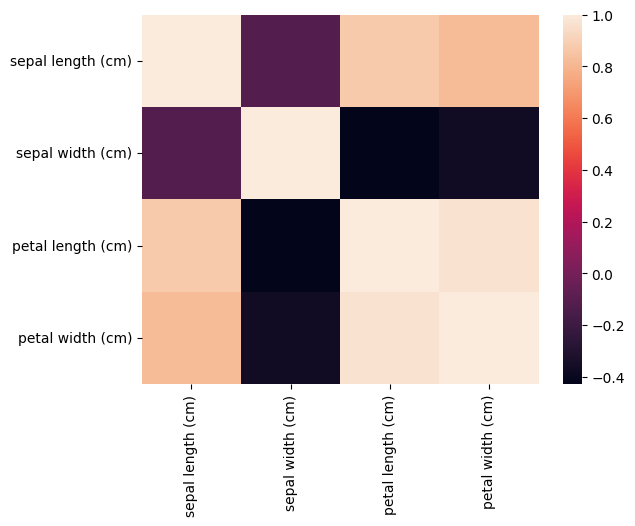

In [24]:
iris = load_iris()
X,y = iris.data, iris.target
chi2_score, chi_2_p_value = chi2(X,y)
f_score, f_p_value = f_classif(X,y)
mut_info_score = mutual_info_classif(X,y)
print("Les scores de corrélation des features :")
print('chi2 score ', chi2_score)
print('F - score score ', f_score)
print('mutual info ', mut_info_score)
dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
corr = dataframe.corr()
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)
plt.show()

Variance expliquée par chaque composante : [0.72962445 0.22850762]
   Composante 1  Composante 2  Classe
0     -2.264703      0.480027       0
1     -2.080961     -0.674134       0
2     -2.364229     -0.341908       0
3     -2.299384     -0.597395       0
4     -2.389842      0.646835       0


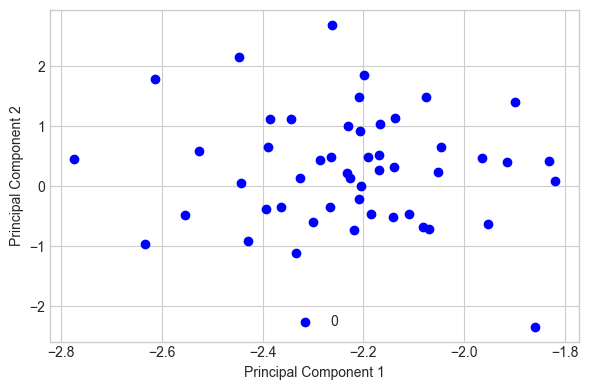

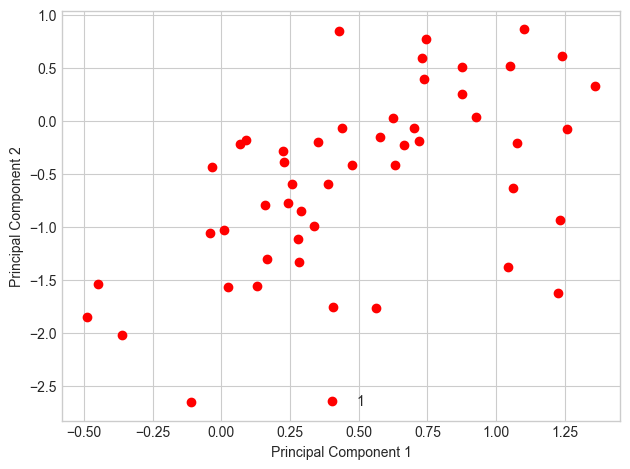

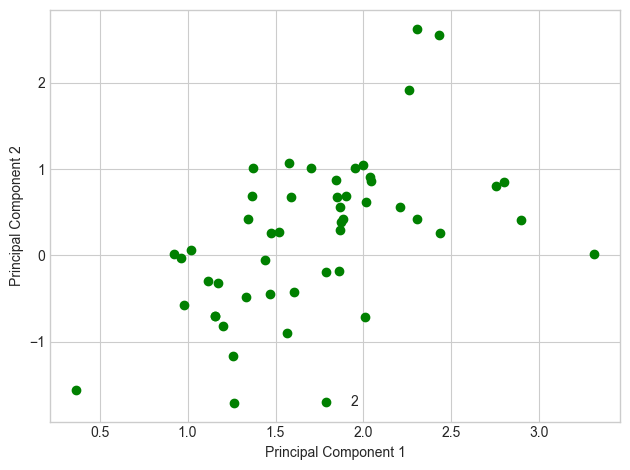

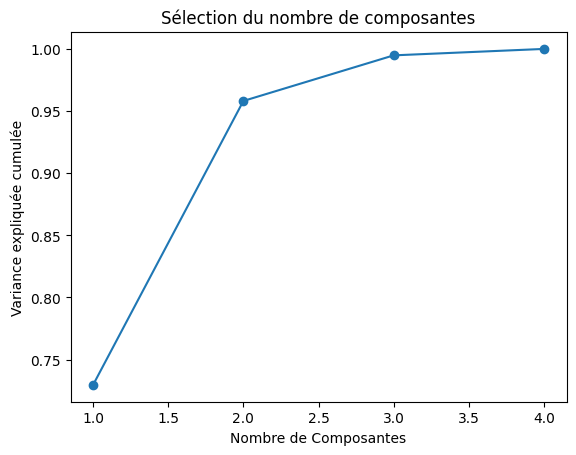

In [28]:
# Charger un jeu de données Iris
data = load_iris()
X = data.data # Caractéristiques
y = data.target # Étiquettes
# Étape 1 : Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)
print("Variance expliquée par chaque composante :",
pca.explained_variance_ratio_)
df_pca = pd.DataFrame(X_pca, columns=['Composante 1', 'Composante 2'])
df_pca['Classe'] = y
print(df_pca.head())
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1, 2),
        ('blue', 'red', 'green')):
        plt.scatter(X_pca[y==lab, 0],
        X_pca[y==lab, 1],
        label=lab,
        c=col)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(loc='lower center')
        plt.tight_layout()
        plt.show()
# Gaphique de la variance expliquée cumulative
pca_full = PCA().fit(X_scaled)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
pca_full.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Sélection du nombre de composantes')
plt.show()